# **ÖDEV-3**

## 1- Persona.csv verisini kullanarak EDA (Exploratory data analysis) yapın.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from dython.data_utils import split_hist

In [2]:
def load_persona():
    data = pd.read_csv("~/Desktop/Patika-Bootcamp/2-+ûdevler/persona.csv")
    return data

In [3]:
df = load_persona()
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [4]:
df.shape  # Veri seti boyutu 

(5000, 5)

In [5]:
df.info() # Veri seti değişkenler bilgisi

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [7]:
df.describe()  # Özet istatistikleri

,PRICE,AGE
count,5000.000000,5000.000000
mean,34.132000,23.581400
std,12.464897,8.995908
min,9.000000,15.000000
25%,29.000000,17.000000
50%,39.000000,21.000000
75%,39.000000,27.000000
max,59.000000,66.000000


### Değişkenler Arasındaki Korelasyon Analizi

In [9]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [10]:
binary_cols = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() <= 4] 

In [11]:
df_label = df.copy()

In [14]:
for col in binary_cols:
    df_label = label_encoder(df_label, col).copy()

In [15]:
df_corr = df_label.corr(method ='pearson')

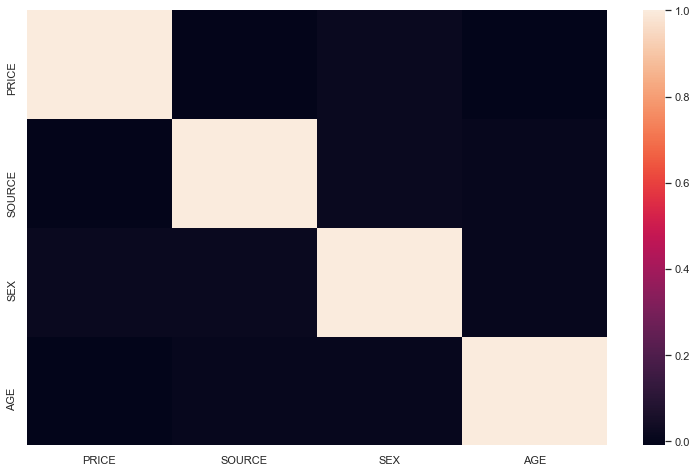

In [17]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.heatmap(df_corr);

## 2-Persona.csv verisini kullanarak Kategorik ve Numerik Değişkenleri belirleyin.

### Numerik ve Kategorik Değişkenlerin Analizi

Numerik ve Kategorik Değişkenlerin Analizi, grab_col_names() fonksiyonu bir dataframedeki değişkenlerin türlerini göstermek için kullanılır.

In [18]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
  
    return cat_cols, num_cols, cat_but_car

In [19]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [20]:
cat_cols  # Kategorik değişkenler

['SOURCE', 'SEX', 'COUNTRY', 'PRICE']

In [21]:
num_cols  # Nümerik değişkenler

['AGE']

In [22]:
cat_but_car  # Kategorik fakat kardinal olan değişkenler

[]

## 3-Persona.csv verisini kullanarak Kategorik ve Numerik Değişkenleri analiz edin. Yorumda bulunun.

### Kategorik Değişkenlerin Bağımlı Değişkene Göre Analizi

Veri setindeki değişkenlerin bağımlı değişkenle olan korelasyon grafiği incelenerek, yüksek korelasyon değerlerine sahip kategorik değişkenler bu bölümde incelenecektir.

cat_summary() veri setindeki kategorik değişkenlerin dağılımını veren özet fonksiyonudur.

In [23]:
def cat_summary(dataframe, col_name, target_col):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe),
                        f"{target_col}"+"_Mean": df.groupby(col_name)[target_col].mean()}))

cat_distribution_plot() veri setindeki kategorik değişkenlerin bağımlı değişkene göre dağılımını gösteren grafik fonksiyonudur.

In [24]:
def cat_distribution_plot(df, cat_col, target_col):
    split_hist(df, target_col, split_by=cat_col, ylabel="Gözlem Sayısı", 
               title=f"{target_col}'e göre {cat_col} Dağılımı", bins=25, figsize=(12.1,4))
    plt.show()

cat_analyser_plot() veri setindeki kategorik değişkenlerin dağılımı ve bağımlı değişkenle olan ilişkisini gösteren grafik fonksiyonudur.

In [25]:
def cat_analyser_plot(df, cat_col, target_col): 
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    df[cat_col].value_counts().plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    axes[0].set_title(f"{cat_col} Dağılımı")
    axes[0].set_xlabel(f"{cat_col}")
    axes[0].set_ylabel("Gözlem Sayısı")
    
    df.groupby(cat_col)[target_col].mean().plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] )
    axes[1].set_title(f"{cat_col}"+" "+"Kırılımında"+" "+f"{target_col}"+" "+ "Ortalaması")
    axes[1].set_xlabel(f"{cat_col}")
    axes[1].set_ylabel(f"{target_col}")
    plt.xticks(rotation=0)
    plt.show()
    
    cat_distribution_plot(df, cat_col, target_col)    

Kategorik değişkenler

In [26]:
cat_cols

['SOURCE', 'SEX', 'COUNTRY', 'PRICE']

Bu örnek çalışma için bağımlı değişken olarak PRICE değişkeni seçilmiştir.

In [27]:
cat_summary(df, "SOURCE", "PRICE")

         SOURCE  Ratio  PRICE_Mean
android    2974  59.48   34.174849
ios        2026  40.52   34.069102


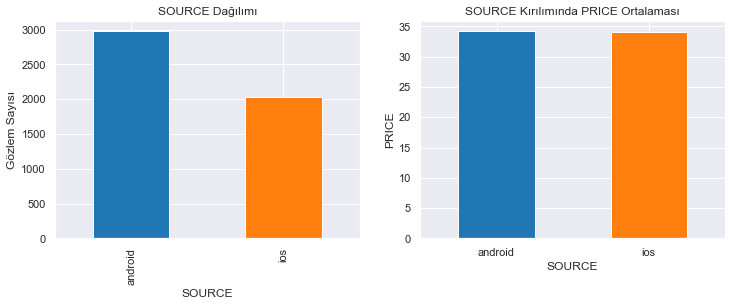

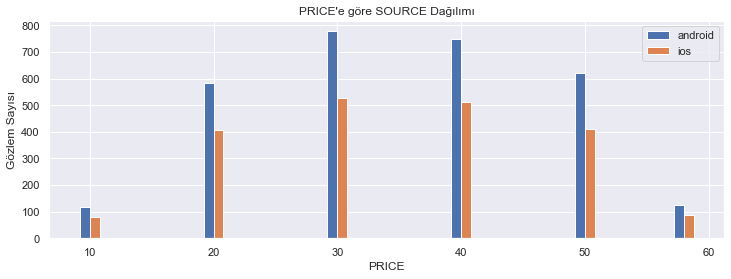

In [30]:
cat_analyser_plot(df, "SOURCE", "PRICE")

Yukarıdaki grafiklerden, kullanıcıların android SOURCE çeşidini ios'a göre daha çok kullandığı görülebilir. Buna karşın, SOURCE kırılımında PRICE ortalaması neredeyse birbirine yakın. Son olarak, PRICE'a göre SOURCE dağılımının 30-40 aralığında yoğunlaştığını görmek mümkün.

In [32]:
cat_summary(df, "SEX", "PRICE")

         SEX  Ratio  PRICE_Mean
female  2621  52.42   33.952308
male    2379  47.58   34.329971


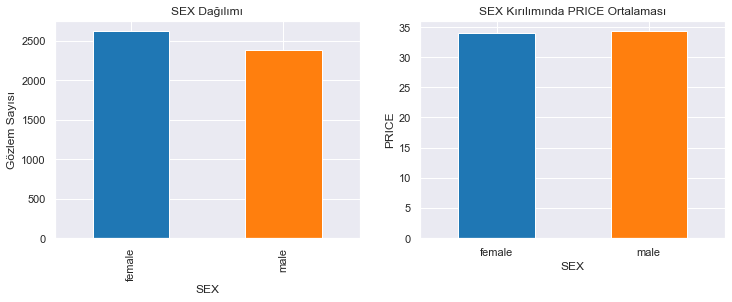

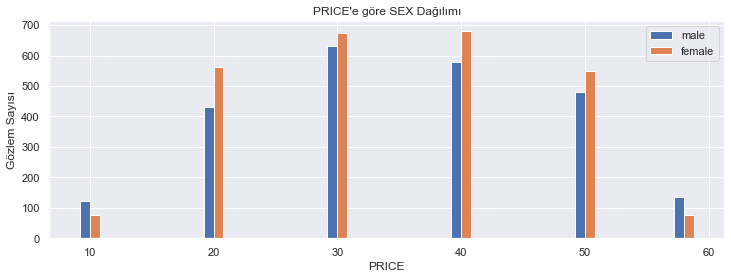

In [33]:
cat_analyser_plot(df, "SEX", "PRICE")

Kullanıcıların SEX değişkeni dağılımı birbirine oldukça yakın ve PRICE'a göre dağılımı normal dağılıma uygun gözüküyor.

In [34]:
cat_summary(df, "COUNTRY", "PRICE")

     COUNTRY  Ratio  PRICE_Mean
bra     1496  29.92   34.327540
can      230   4.60   33.608696
deu      455   9.10   34.032967
fra      303   6.06   33.587459
tur      451   9.02   34.787140
usa     2065  41.30   34.007264


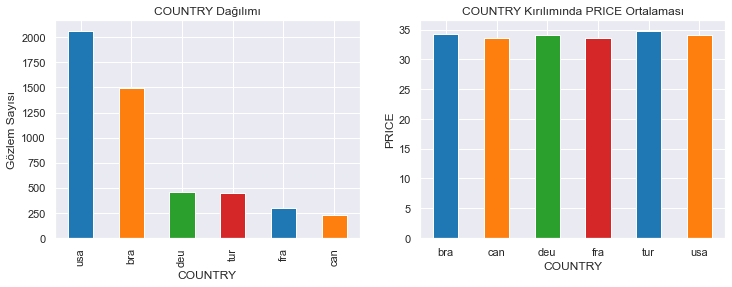

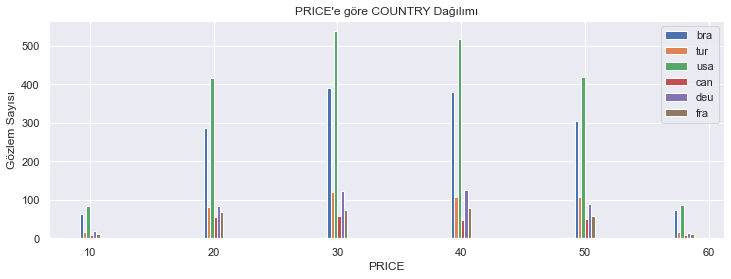

In [35]:
cat_analyser_plot(df, "COUNTRY", "PRICE")

Kullanıcıların çoğunluğu usa'dan olmasına karşın PRICE ortalamaları birbirine eşit görünüyor. Bu durum, model geliştirirken anlamlı bir durumu ifade edebilir.  

### Nümerik Değişkenlerin Bağımlı Değişkene Göre Analizi

Veri setindeki değişkenlerin bağımlı değişkenle olan korelasyon grafiği incelenerek, yüksek korelasyon değerlerine sahip nümerik değişkenler bu bölümde incelenecektir.

In [36]:
num_cols  # Nümerik değişkenler

['AGE']

num_summary() veri setindeki nümerik değişkenlerin dağılımını veren özet fonksiyonudur.

In [37]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print("\t\t\t"+f"{numerical_col}"+" Nümerik Değişken Özet İstatistiği")
    print("\t\t\t---------------------------------------------")
    print(pd.DataFrame(dataframe[numerical_col].describe(quantiles)).T, "\n")

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

num_analyser_plot() veri setindeki nümerik değişkenlerin dağılımı ve bağımlı değişkenle olan ilişkisini gösteren grafik fonksiyonudur.

In [38]:
def num_analyser_plot(df, num_col, target_col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[num_col], kde=True, bins=30, ax=axes[0]);
    axes[0].lines[0].set_color('green')
    axes[0].set_title(f"{num_col}"+" "+"Dağılımı")
    axes[0].set_ylabel("Gözlem Sayısı")
    
    quantiles = [0, 0.25, 0.50, 0.75, 1]
    num_df = df.copy()
    num_df[f"{num_col}"+"_CAT"] = pd.qcut(df[num_col], q=quantiles) # nümerik değişken kategorize edildi.
    df_2 = num_df.groupby(f"{num_col}"+"_CAT")[target_col].mean()
    
    sns.barplot(x=df_2.index, y=df_2.values);
    axes[1].set_title(f"{num_col} Kırılımında {target_col} Ortalaması")
    axes[1].set_ylabel(f"{target_col}")

    plt.show()

			AGE Nümerik Değişken Özet İstatistiği
			---------------------------------------------
      count     mean       std   min    5%   10%   20%   30%   40%   50%  \
AGE  5000.0  23.5814  8.995908  15.0  15.0  15.0  16.0  17.0  19.0  21.0   

      60%   70%   80%   90%   95%   99%   max  
AGE  23.0  26.0  30.0  36.0  43.0  53.0  66.0   



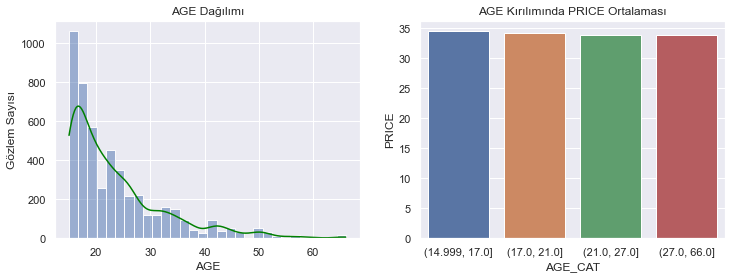

In [39]:
num_summary(df, "AGE")
num_analyser_plot(df, "AGE", "PRICE")

Müşteri yaş kırılımı incelendiğinde çoğunluğun 15-22 yaş aralığında dağıldığını görmek mümkün. Bu durum, şirketin müşteri ana hedef müşteri profilini belirliyor. AGE dağılımının genç yaşlarda yoğun olmasına karşın PRICE'a göre ortalaması tüm yaş grupları için neredeyse eşit gözüküyor. Buna göre, daha yaşlı olanların PRICE sonuçları daha yüksek olduğu görülebilir. Geliştirilecek model için anlamlı bir değişken olabilir.